<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

# Isolation Forest with MinMaxScaler



This code template is for Anomaly Detection using the Isolation Forest Algorithm and MinMaxScaler for python data-rescaling operations. The MinMaxScaler transforms features by scaling each feature to a given range.

### Required Packages

In [1]:
!pip install plotly
!pip install pyod

In [2]:
import time
import warnings
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from pyod.models.iforest import IForest
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
warnings.filterwarnings("ignore")

### Initialization

Filepath of CSV file

In [3]:
#filepath
file_path=""

List of features which are  required for model training .

In [4]:
#x_values
features=[]

### Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [5]:
df=pd.read_csv(file_path) #reading file
df.head()#displaying initial entries

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
print('Number of rows are :',df.shape[0], ',and number of columns are :',df.shape[1])

Number of rows are : 303 ,and number of columns are : 14


In [7]:
df.columns.tolist()


['age',
 'sex',
 'cp',
 'trtbps',
 'chol',
 'fbs',
 'restecg',
 'thalachh',
 'exng',
 'oldpeak',
 'slp',
 'caa',
 'thall',
 'output']

### Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X.

In [8]:
#spliting data into X(features) 

X=df[features]

### Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes.


In [9]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)

Calling preprocessing functions on the feature and target set.

In [10]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
X.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2



### Data Scaling
**Used MinMaxScaler**

* Transform features by scaling each feature to a given range.

* This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

In [11]:
X_Scaled=MinMaxScaler().fit_transform(X)
X_Scaled=pd.DataFrame(data = X_Scaled,columns = X.columns)
X_Scaled.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667


### Data Splitting
The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [12]:
x_train,x_test=train_test_split(X_Scaled,test_size=0.2,random_state=123) #performing datasplitting

## Model

The IsolationForest ‘isolates’ observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature. Since recursive partitioning can be represented by a tree structure, the number of splittings required to isolate a sample is equivalent to the path length from the root node to the terminating node.This path length, averaged over a forest of such random trees, is a measure of normality and our decision function. Random partitioning produces noticeably shorter paths for anomalies. Hence, when a forest of random trees collectively produce shorter path lengths for particular samples, they are highly likely to be anomalies.

**Tuning parameters :**

* n_estimator – The number of base estimators in the ensemble.

* contamination – The amount of contamination of the data set, i.e. the proportion of outliers in the data set. Used when fitting to define the threshold on the decision function.

* bootstrap- If True, individual trees are fit on random subsets of the training data sampled with replacement. If False, sampling without replacement is performed.

* max_features- The number of features to draw from X to train each base estimator.

* max_samples-The number of samples to draw from X to train each base estimator.

In [13]:
model = IForest(contamination = 0.01, n_jobs=-1)
model.fit(x_train)

IForest(behaviour='old', bootstrap=False, contamination=0.01,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=None, verbose=0)

### Anomaly Prediction

In [14]:
result=x_test.copy(deep=True)
result['Anomaly']=model.predict(x_test)
result.head()


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Anomaly
11,0.395833,0.0,0.666667,0.339623,0.340183,0.0,0.5,0.519084,0.0,0.032258,1.0,0.0,0.666667,0
292,0.604167,0.0,0.000000,0.716981,0.226027,1.0,0.0,0.572519,1.0,0.451613,0.5,0.5,0.333333,1
269,0.562500,1.0,0.000000,0.339623,0.358447,1.0,0.0,0.244275,1.0,0.258065,0.0,0.0,1.000000,0
268,0.520833,1.0,0.000000,0.264151,0.365297,0.0,0.0,0.343511,1.0,0.516129,0.5,0.5,0.666667,0
94,0.333333,0.0,0.333333,0.169811,0.077626,0.0,0.5,0.511450,0.0,0.000000,0.5,0.0,0.666667,0


### Anomaly Visualization¶
#### Bar Plot

<AxesSubplot:>

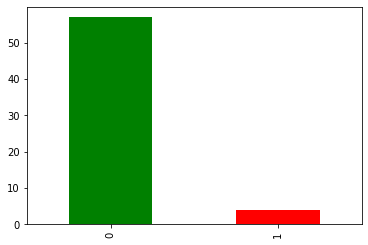

In [15]:
result['Anomaly'].value_counts().plot(kind='bar',color=['green','red'])

#### Pie Chart

In [16]:
fig = px.pie(result['Anomaly'],names=result['Anomaly'], title='Anomaly rate')
fig.show()

### Anomalies
In this part we will perform Dimensionality Reduction technique to visualize data. This can be performed using technique such as PCA or TSNE algorithms.

In [17]:
pca = PCA(n_components=2)
pca_results = pca.fit_transform(result.drop('Anomaly',axis=1))

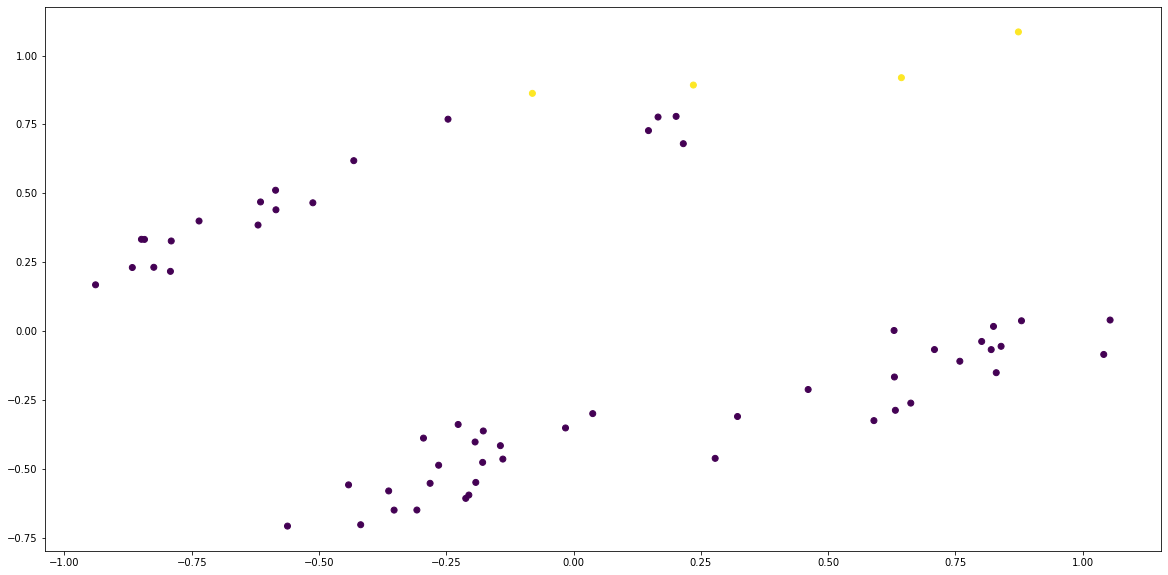

In [18]:
plt.rcParams["figure.figsize"] = (20,10)
plt.scatter(x=pca_results[:,0],y=pca_results[:,1],c=result.iloc[:,result.columns.get_loc('Anomaly')])
plt.show()

#### Creator: Vipin Kumar , Github: [Profile](https://github.com/devVipin01)